# 1. Load data

In [5]:
import pandas as pd

gtd=pd.read_csv('gtd_clean.csv',encoding='latin1',low_memory=False)

gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
1,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
2,1.970010e+11,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
3,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
4,1.970010e+11,1970,1,6,NaN,0,NaN,217,United States,1,...,NaN,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN


# 2. Select a region and find distance between each datapoint in the region

In [119]:
import matplotlib as mpl
from pandas import Series as s
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

# select a region here it is Australia 
regData=gtd[gtd['region']==12]

# get region data. find groups in it
groups=regData['gname'].tolist()
unique=s.unique(regData['gname'])

# with features of the data find euclidean distance  between each data point
regDataIP=regData[['country', 'attacktype1', 'iyear','targtype1','success']]
dist=euclidean_distances(regDataIP)

# 3. Reduce dimensionality of data with MDS

##### Here data is reduced to 3 dimensions so that we could visualize better

In [123]:
# apply MDS
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist) 

In [121]:
from sklearn.decomposition import PCA
%matplotlib inline 
#titles=s.unique(regData['gname'])[i]

#Apply PCA
clf = PCA(n_components=3)
x=clf.fit_transform(regDataIP)

pcapos= = clf.fit_transform(pos)

# 4. Scatter plot the reduced data for better visualization

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


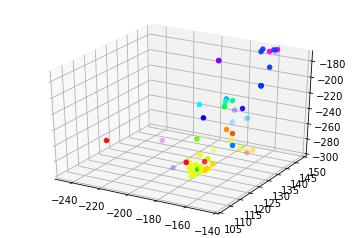

In [154]:
fig = plt.figure(1)

from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes([0., 0., 1., 1.])
cm = plt.get_cmap('gist_rainbow')
s = 30
ax.set_color_cycle([cm(1.*i/len(unique)) for i in range(len(unique))])

ax.set_xlim3d(-250, -140)
ax.set_ylim3d(105,150)
ax.set_zlim3d(-300,-170)
#print(groups)
for group in unique: 
    idx= [i for i, x in enumerate(groups) if x == group]
    gpos=pos[idx,:]
    ax.scatter(gpos[:, 0], gpos[:, 1],gpos[:,2], s=s, lw=0)
    plt.legend(scatterpoints=1, loc='best', shadow=False)
